# Table of Contents

01. Import Libraries
02. Import Data frame
03. Data cleaning, wrangling and subsetting

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02. Import Data Frame

In [2]:
# Create path

path = r'/Users/dianaalatriste/Documents/Olympic Games'

In [3]:
# Call path

path

'/Users/dianaalatriste/Documents/Olympic Games'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'Olympic_Results_Merged_wcodes.csv'))

In [5]:
# Check output

df.head(10)

,Unnamed: 0,athlete_id,result_id,pos,medal,isTeamSport,name,gender,born,height,...,sport,result_detail,start_date,end_date,age,season,medal_code,gender_code,sport_code,season_code
0,0,64710,56265,DNS,na,False,Ernest Hutcheon,Male,1889-06-17,176.960745,...,Athletics,na,1908-07-20,1908-07-22,19.088296,Summer,3,1,9,0
1,1,64756,56313,DNS,na,False,Henry Murray,Male,1886-01-14,179.660099,...,Athletics,na,1908-07-21,1908-07-25,22.513347,Summer,3,1,9,0
2,2,64808,56338,3 h8 r1/2,na,False,Harvey Sutton,Male,1882-02-18,179.050863,...,Athletics,na,1908-07-20,1908-07-21,26.414784,Summer,3,1,9,0
3,3,922519,56338,DNS,na,False,Guy Haskins,Male,1883-12-23,179.050863,...,Athletics,na,1908-07-20,1908-07-21,24.572211,Summer,3,1,9,0
4,4,64735,56338,DNS,na,False,Joseph Lynch,Male,1878-04-22,179.050863,...,Athletics,na,1908-07-20,1908-07-21,30.242300,Summer,3,1,9,0
5,5,64756,56338,DNS,na,False,Henry Murray,Male,1886-01-14,179.050863,...,Athletics,na,1908-07-20,1908-07-21,22.510609,Summer,3,1,9,0
6,6,64735,56349,5 h2 r1/2,na,False,Joseph Lynch,Male,1878-04-22,177.920955,...,Athletics,na,1908-07-13,1908-07-14,30.223135,Summer,3,1,9,0
7,7,79576,56349,AC h3 r1/2,na,False,Charles Swain,Male,1885-01-16,177.920955,...,Athletics,na,1908-07-13,1908-07-14,23.485284,Summer,3,1,9,0
8,8,922519,56349,DNS,na,False,Guy Haskins,Male,1883-12-23,177.920955,...,Athletics,na,1908-07-13,1908-07-14,24.553046,Summer,3,1,9,0
9,9,64619,56349,DNS,na,False,George Blake,Male,1878-09-04,167.000000,...,Athletics,na,1908-07-13,1908-07-14,29.853525,Summer,3,1,9,0


In [6]:
# Check columns

df.columns

Index(['Unnamed: 0', 'athlete_id', 'result_id', 'pos', 'medal', 'isTeamSport',
       'name', 'gender', 'born', 'height', 'weight', 'country', 'country_noc',
       'event_title', 'edition', 'edition_id', 'sport', 'result_detail',
       'start_date', 'end_date', 'age', 'season', 'medal_code', 'gender_code',
       'sport_code', 'season_code'],
      dtype='object')

In [7]:
# Check shape

df.shape

(314907, 26)

# 03. Data cleaning, wrangling and subsetting. 

In [8]:
# Drop not relevant columns 
df1 = df.drop(columns = ['Unnamed: 0', 'result_id', 'pos', 'medal', 'isTeamSport', 'name', 'born', 'country', 'country_noc', 'event_title', 'edition', 'edition_id', 'sport', 'result_detail', 'end_date', 'age', 'medal_code', 'gender_code', 'sport_code', 'season_code'])

In [9]:
# Check outcome

df1.head()

,athlete_id,gender,height,weight,start_date,season
0,64710,Male,176.960745,72.096796,1908-07-20,Summer
1,64756,Male,179.660099,71.493797,1908-07-21,Summer
2,64808,Male,179.050863,67.571038,1908-07-20,Summer
3,922519,Male,179.050863,67.571038,1908-07-20,Summer
4,64735,Male,179.050863,67.571038,1908-07-20,Summer


In [10]:
# Check for missing values

df1.isnull().sum() 

athlete_id      0
gender          0
height        863
weight        863
start_date    104
season          0
dtype: int64

In [11]:
# Drop 'na' values from 'height' and 'weight' in df1

df1.dropna(subset = ['height', 'weight'], inplace = True)

In [13]:
# Recheck for missing values

df1.isnull().sum() 

athlete_id     0
gender         0
height         0
weight         0
start_date    42
season         0
dtype: int64

In [14]:
# Drop 'na' values from 'start_date' in df1

df1.dropna(subset = ['start_date'], inplace = True)

In [15]:
# Recheck for missing values

df1.isnull().sum() 

athlete_id    0
gender        0
height        0
weight        0
start_date    0
season        0
dtype: int64

In [16]:
# Check data types


df1.dtypes

athlete_id      int64
gender         object
height        float64
weight        float64
start_date     object
season         object
dtype: object

In [17]:
# Convert the 'start_date' column to datetime

df1['start_date'] = pd.to_datetime(df1['start_date'], errors='coerce')

In [20]:
# Extract 'year' from start_date column and create a new column

df1['year'] = df1['start_date'].dt.year

In [21]:
# Check frequency of 'year' column

df1['year'].value_counts(dropna = False)

1992.0    17198
1988.0    15946
2021.0    14618
2000.0    14032
1996.0    13994
2008.0    13975
2016.0    13941
2004.0    13756
2012.0    13196
1972.0    12586
1984.0    12288
1968.0    11174
1976.0    10869
1952.0    10355
1964.0    10053
1960.0     9680
1980.0     9267
1936.0     8484
1948.0     8259
1956.0     6950
1924.0     6936
1928.0     6357
1912.0     5418
2022.0     5388
2018.0     5196
2014.0     4984
1920.0     4595
2010.0     4467
2006.0     4403
2002.0     4127
1932.0     4082
1908.0     3998
1998.0     3698
1994.0     3225
1904.0     3012
1900.0     2722
1896.0      619
NaN         131
1906.0       23
Name: year, dtype: int64

In [22]:
# Drop 'na' values from 'year' in df1

df1.dropna(subset = ['year'], inplace = True)

In [23]:
# Recheck frequency of 'year' column

df1['year'].value_counts(dropna = False)

1992.0    17198
1988.0    15946
2021.0    14618
2000.0    14032
1996.0    13994
2008.0    13975
2016.0    13941
2004.0    13756
2012.0    13196
1972.0    12586
1984.0    12288
1968.0    11174
1976.0    10869
1952.0    10355
1964.0    10053
1960.0     9680
1980.0     9267
1936.0     8484
1948.0     8259
1956.0     6950
1924.0     6936
1928.0     6357
1912.0     5418
2022.0     5388
2018.0     5196
2014.0     4984
1920.0     4595
2010.0     4467
2006.0     4403
2002.0     4127
1932.0     4082
1908.0     3998
1998.0     3698
1994.0     3225
1904.0     3012
1900.0     2722
1896.0      619
1906.0       23
Name: year, dtype: int64

In [24]:
# Check head

df1.head()

,athlete_id,gender,height,weight,start_date,season,year
0,64710,Male,176.960745,72.096796,1908-07-20,Summer,1908.0
1,64756,Male,179.660099,71.493797,1908-07-21,Summer,1908.0
2,64808,Male,179.050863,67.571038,1908-07-20,Summer,1908.0
3,922519,Male,179.050863,67.571038,1908-07-20,Summer,1908.0
4,64735,Male,179.050863,67.571038,1908-07-20,Summer,1908.0


In [25]:
# Changing data type of 'year' column

df1['year'] = df1['year'].astype('int')

In [26]:
# Recheck data types of df1

df1.dtypes

athlete_id             int64
gender                object
height               float64
weight               float64
start_date    datetime64[ns]
season                object
year                   int64
dtype: object

In [27]:
# Check head

df1.head()

,athlete_id,gender,height,weight,start_date,season,year
0,64710,Male,176.960745,72.096796,1908-07-20,Summer,1908
1,64756,Male,179.660099,71.493797,1908-07-21,Summer,1908
2,64808,Male,179.050863,67.571038,1908-07-20,Summer,1908
3,922519,Male,179.050863,67.571038,1908-07-20,Summer,1908
4,64735,Male,179.050863,67.571038,1908-07-20,Summer,1908


In [29]:
# Create a subset of female athletes and another one of male athletes

female = df1[df1['gender'] == 'Female'].groupby(['year', 'season'])['athlete_id'].nunique().reset_index()
female.rename(columns={'athlete_id': 'count_F'}, inplace = True)

male = df1[df1['gender'] == 'Male'].groupby(['year', 'season'])['athlete_id'].nunique().reset_index()
male.rename(columns={'athlete_id': 'count_M'}, inplace = True)


In [30]:
# Check output female

female.head()

,year,season,count_F
0,1896,Summer,2
1,1900,Summer,27
2,1904,Summer,6
3,1908,Summer,54
4,1912,Summer,62


In [33]:
female

,year,season,count_F
0,1896,Summer,2
1,1900,Summer,27
2,1904,Summer,6
3,1908,Summer,54
4,1912,Summer,62
5,1920,Summer,94
6,1924,Summer,170
7,1924,Winter,16
8,1928,Summer,345
9,1928,Winter,28


In [39]:
female.dtypes

year        int64
season     object
count_F     int64
dtype: object

In [40]:
# Drop 'na' values from 'season' in female

female = female[female['season'] != 'na']

In [41]:
# Check frequency of column 'season' in female

female['season'].value_counts(dropna = False)

Summer    29
Winter    24
Name: season, dtype: int64

In [31]:
# Check output male

male.head()

,year,season,count_M
0,1896,Summer,241
1,1900,Summer,1445
2,1904,Summer,1318
3,1906,na,8
4,1908,Summer,2333


In [42]:
# Check frequency of column 'season' in female

male['season'].value_counts(dropna = False)

Summer    29
Winter    24
na         2
Name: season, dtype: int64

In [43]:
# Drop 'na' values from 'season' in male

male = male[male['season'] != 'na']

In [44]:
# Check frequency of column 'season' in female

male['season'].value_counts(dropna = False)

Summer    29
Winter    24
Name: season, dtype: int64

In [46]:
#Merge 'female' with 'male'

number_athletes = male.merge(female,on=['year', 'season'],how='left')
number_athletes.rename(columns={'count_M':'Male','count_F':'Female'},inplace=True)
number_athletes = number_athletes.fillna(0)
number_athletes

,year,season,Male,Female
0,1896,Summer,241,2
1,1900,Summer,1445,27
2,1904,Summer,1318,6
3,1908,Summer,2333,54
4,1912,Summer,2809,62
5,1920,Summer,2739,94
6,1924,Summer,3710,170
7,1924,Winter,338,16
8,1928,Summer,3427,345
9,1928,Winter,478,28


In [47]:
# Export Data Frame

number_athletes.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Olympic_Results_Tableau1.csv'))

## Group by number of medals

In [50]:
# Replace the 'na' to 'no medal' in column 'medal' in df

df['medal'] = df['medal'].replace('na','no medal')

In [51]:
# Check outcome by checking frequency of values

df['medal'].value_counts(dropna = False)

no medal    270336
Gold         15027
Bronze       14904
Silver       14640
Name: medal, dtype: int64

In [52]:
# Drop not relevant columns 

df2 = df.drop(columns = ['Unnamed: 0', 'result_id', 'pos', 'isTeamSport', 'name', 'born', 'country', 'country_noc', 'event_title', 'edition', 'edition_id', 'sport', 'result_detail', 'end_date', 'medal_code', 'gender_code', 'sport_code', 'season_code'])

In [53]:
# Check outcome

df2.head()

,athlete_id,medal,gender,height,weight,start_date,age,season
0,64710,no medal,Male,176.960745,72.096796,1908-07-20,19.088296,Summer
1,64756,no medal,Male,179.660099,71.493797,1908-07-21,22.513347,Summer
2,64808,no medal,Male,179.050863,67.571038,1908-07-20,26.414784,Summer
3,922519,no medal,Male,179.050863,67.571038,1908-07-20,24.572211,Summer
4,64735,no medal,Male,179.050863,67.571038,1908-07-20,30.242300,Summer


In [54]:
# Check for missing values

df2.isnull().sum() 

athlete_id      0
medal           0
gender          0
height        863
weight        863
start_date    104
age           130
season          0
dtype: int64

In [55]:
# Drop 'na' values from 'height' and 'weight' in df2

df2.dropna(subset = ['height', 'weight', 'start_date'], inplace = True)

In [56]:
# Recheck for missing values

df2.isnull().sum() 

athlete_id    0
medal         0
gender        0
height        0
weight        0
start_date    0
age           0
season        0
dtype: int64

In [57]:
# Convert the 'start_date' column to datetime

df2['start_date'] = pd.to_datetime(df2['start_date'], errors='coerce')

In [58]:
# Extract 'year' from start_date column and create a new column

df2['year'] = df2['start_date'].dt.year
df2.dropna(subset = ['year'], inplace = True)

In [59]:
# Check outcome

df2.head()

,athlete_id,medal,gender,height,weight,start_date,age,season,year
0,64710,no medal,Male,176.960745,72.096796,1908-07-20,19.088296,Summer,1908.0
1,64756,no medal,Male,179.660099,71.493797,1908-07-21,22.513347,Summer,1908.0
2,64808,no medal,Male,179.050863,67.571038,1908-07-20,26.414784,Summer,1908.0
3,922519,no medal,Male,179.050863,67.571038,1908-07-20,24.572211,Summer,1908.0
4,64735,no medal,Male,179.050863,67.571038,1908-07-20,30.242300,Summer,1908.0


In [60]:
# Check frequency of column 'year'

df2['year'].value_counts(dropna = False)

1992.0    17198
1988.0    15946
2021.0    14618
2000.0    14032
1996.0    13994
2008.0    13975
2016.0    13941
2004.0    13756
2012.0    13196
1972.0    12586
1984.0    12288
1968.0    11174
1976.0    10869
1952.0    10355
1964.0    10053
1960.0     9680
1980.0     9267
1936.0     8484
1948.0     8259
1956.0     6950
1924.0     6936
1928.0     6357
1912.0     5418
2022.0     5388
2018.0     5196
2014.0     4984
1920.0     4595
2010.0     4467
2006.0     4403
2002.0     4127
1932.0     4082
1908.0     3998
1998.0     3698
1994.0     3225
1904.0     3012
1900.0     2722
1896.0      619
1906.0       23
Name: year, dtype: int64

In [61]:
# Changing data type of 'year' column

df2['year'] = df2['year'].astype('int')

In [62]:
df2.dtypes

athlete_id             int64
medal                 object
gender                object
height               float64
weight               float64
start_date    datetime64[ns]
age                  float64
season                object
year                   int64
dtype: object

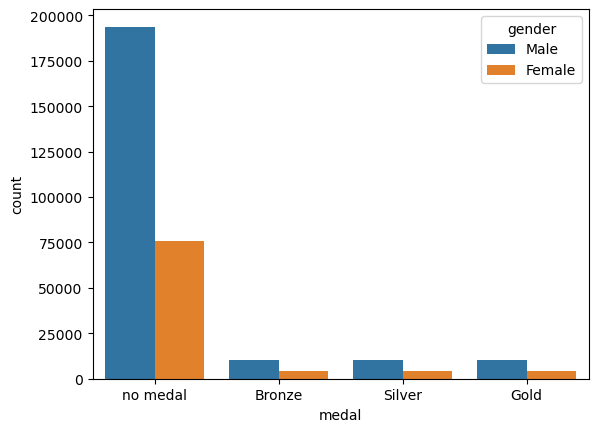

In [63]:
# Plot number of medals per gender

df2.groupby(['gender'])['year'].value_counts(normalize=True)
sns.countplot(data=df2, x='medal', hue='gender');

In [64]:
# Export data frame

df2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Olympic_Results_Tableau2.csv'))